In [5]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical computations
import numpy as np

# Import Seaborn for data visualization
import seaborn as sns

# Import Matplotlib for creating plots and graphs
import matplotlib.pyplot as plt

# Import datetime for handling date and time-related operations
from datetime import datetime, timedelta

# Import functions and classes for machine learning tasks
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score as ras, roc_curve, auc, accuracy_score


# Import the Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression


# Import the Random Forest classifier for ensemble learning
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Read the training data from a Parquet file into a Pandas DataFrame
train_data = pd.read_parquet("sample_data/train.parquet")

In [7]:
# Display the first few rows of the training data
train_data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [8]:
# Generate summary statistics for the training data
train_data.describe()

<ipython-input-8-7e87d3225b90>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data.describe()


,Patient-Uid,Date,Incident
count,3220868,3220868,3220868
unique,27033,1977,57
top,a0ddfd2c-1c7c-11ec-876d-16262ee38c7f,2019-05-21 00:00:00,DRUG_TYPE_6
freq,1645,3678,561934
first,NaN,2015-04-07 00:00:00,NaN
last,NaN,2020-09-03 00:00:00,NaN


In [9]:
# Check for missing values in the training data
train_data.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [10]:
# Check for duplicate rows and remove them from the training data
train_data.duplicated().sum()

35571

In [11]:
# Remove duplicates from the training data
train_data = train_data.drop_duplicates()

In [12]:
# Check for duplicate rows after removing them
train_data.duplicated().sum()

0

In [13]:
# Display the data types of the columns in the training data
train_data.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [14]:
# Extract unique values of the 'Incident' column in the training data
print("Unique values of Incident \n")
print(train_data['Incident'].unique())

Unique values of Incident 

['PRIMARY_DIAGNOSIS' 'SYMPTOM_TYPE_0' 'DRUG_TYPE_0' 'DRUG_TYPE_1'
 'DRUG_TYPE_2' 'TEST_TYPE_0' 'DRUG_TYPE_3' 'DRUG_TYPE_4' 'DRUG_TYPE_5'
 'DRUG_TYPE_6' 'DRUG_TYPE_8' 'DRUG_TYPE_7' 'SYMPTOM_TYPE_1' 'DRUG_TYPE_10'
 'SYMPTOM_TYPE_29' 'SYMPTOM_TYPE_2' 'DRUG_TYPE_11' 'DRUG_TYPE_9'
 'DRUG_TYPE_13' 'SYMPTOM_TYPE_5' 'TEST_TYPE_1' 'SYMPTOM_TYPE_6'
 'TEST_TYPE_2' 'SYMPTOM_TYPE_3' 'SYMPTOM_TYPE_8' 'DRUG_TYPE_14'
 'DRUG_TYPE_12' 'SYMPTOM_TYPE_9' 'SYMPTOM_TYPE_10' 'SYMPTOM_TYPE_7'
 'SYMPTOM_TYPE_11' 'TEST_TYPE_3' 'DRUG_TYPE_15' 'SYMPTOM_TYPE_4'
 'SYMPTOM_TYPE_14' 'SYMPTOM_TYPE_13' 'SYMPTOM_TYPE_16' 'SYMPTOM_TYPE_17'
 'SYMPTOM_TYPE_15' 'SYMPTOM_TYPE_18' 'SYMPTOM_TYPE_12' 'SYMPTOM_TYPE_20'
 'SYMPTOM_TYPE_21' 'DRUG_TYPE_17' 'SYMPTOM_TYPE_22' 'TEST_TYPE_4'
 'SYMPTOM_TYPE_23' 'DRUG_TYPE_16' 'TEST_TYPE_5' 'SYMPTOM_TYPE_19'
 'SYMPTOM_TYPE_24' 'SYMPTOM_TYPE_25' 'SYMPTOM_TYPE_26' 'SYMPTOM_TYPE_27'
 'DRUG_TYPE_18' 'SYMPTOM_TYPE_28' 'TARGET DRUG']


In [15]:
# Filter the positive data with 'Incident' equal to 'TARGET DRUG'
positive_data = train_data[train_data['Incident']=='TARGET DRUG']
positive_data.head()

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [16]:
# Create a negative dataset by excluding patients from the positive dataset
negative =  train_data[~train_data['Patient-Uid'].isin(positive_data['Patient-Uid'])]
negative_data = negative.groupby('Patient-Uid').tail(1)
negative_data

,Patient-Uid,Date,Incident
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS
...,...,...,...
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6


In [17]:
# Calculate the 'Prescription_Count' for both positive and negative datasets
positive_data['Prescription_Count'] = positive_data.groupby('Patient-Uid')['Date'].cumcount()
negative_data['Prescription_Count'] = negative_data.groupby('Patient-Uid')['Date'].cumcount()
positive_data.tail(5)

<ipython-input-17-1a72b642929e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_data['Prescription_Count'] = positive_data.groupby('Patient-Uid')['Date'].cumcount()
<ipython-input-17-1a72b642929e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['Prescription_Count'] = negative_data.groupby('Patient-Uid')['Date'].cumcount()


,Patient-Uid,Date,Incident,Prescription_Count
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,4
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,9
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,10
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,14
29080178,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG,13


In [18]:
negative_data.tail()

,Patient-Uid,Date,Incident,Prescription_Count
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS,0
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS,0
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS,0
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6,0
3256805,a0e69331-1c7c-11ec-a98d-16262ee38c7f,2015-10-03,DRUG_TYPE_6,0


In [19]:
# Calculate the 'Time_diff' for both datasets based on a prediction date
prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
positive_data['Time_diff'] = (prediction_date - positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
negative_data['Time_diff'] = (prediction_date - negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days

<ipython-input-19-cdfc937a0060>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_data['Time_diff'] = (prediction_date - positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
<ipython-input-19-cdfc937a0060>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['Time_diff'] = (prediction_date - negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days


In [20]:
positive_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1197
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1451
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1476
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1181
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1197


In [21]:
negative_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS,0,2027
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0,0,3152
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6,0,1919
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2,0,1920
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS,0,1317


In [22]:
# Concatenate the positive and negative datasets to create the final dataset
final_data = pd.concat([positive_data, negative_data])
final_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1197
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1451
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1476
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1181
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1197


In [23]:
# Split the final dataset into training and testing sets
X_train,X_test,y_train,y_test = X_train, X_test, y_train, y_test = train_test_split(final_data[['Prescription_Count', 'Time_diff']], final_data['Incident'] == 'TARGET DRUG', test_size = 0.25, random_state=42)

In [24]:
# Train a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model using the F1-score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.961200978929147


In [25]:
# Calculate and display the accuracy score of the model on the test set
accuracy_score(y_test, y_pred)

0.9387370405278039

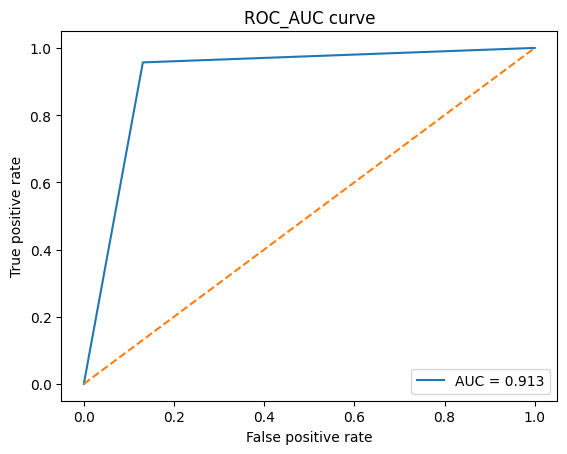

In [26]:
# Calculate and plot the ROC-AUC curve
fpr,tpr, thresold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title('ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [27]:
# Load the test data from a Parquet file
test_data = pd.read_parquet("sample_data/test.parquet")

In [28]:
# Display the first 5 rows of the test data
test_data.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [29]:
# Display the last 5 rows of the test data
test_data.tail()

,Patient-Uid,Date,Incident
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-19,DRUG_TYPE_7


In [30]:
# Generate descriptive statistics for the test data
test_data.describe()

<ipython-input-30-0777917ce040>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test_data.describe()


,Patient-Uid,Date,Incident
count,1065524,1065524,1065524
unique,11482,1947,55
top,a0faa6ed-1c7c-11ec-8f6f-16262ee38c7f,2018-03-13 00:00:00,DRUG_TYPE_6
freq,1236,1139,192292
first,NaN,2015-04-07 00:00:00,NaN
last,NaN,2020-08-04 00:00:00,NaN


In [31]:
# Check for missing (null) values in the test data
test_data.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [32]:
# Calculate the number of duplicated rows in the test data
test_data.duplicated().sum()

12100

In [33]:
# Remove duplicate rows from the test data
test_data = test_data.drop_duplicates()

In [34]:
# Recalculate the number of duplicated rows after removing duplicates
test_data.duplicated().sum()

0

In [35]:
# Print unique values in the 'Incident' column of the test data
print("Unique values of Incident \n")
print(test_data['Incident'].unique())

Unique values of Incident 

['SYMPTOM_TYPE_0' 'DRUG_TYPE_0' 'DRUG_TYPE_2' 'DRUG_TYPE_1'
 'PRIMARY_DIAGNOSIS' 'DRUG_TYPE_8' 'TEST_TYPE_0' 'DRUG_TYPE_7'
 'DRUG_TYPE_11' 'SYMPTOM_TYPE_6' 'DRUG_TYPE_5' 'DRUG_TYPE_6' 'DRUG_TYPE_9'
 'DRUG_TYPE_15' 'TEST_TYPE_3' 'SYMPTOM_TYPE_3' 'TEST_TYPE_1' 'DRUG_TYPE_3'
 'TEST_TYPE_2' 'SYMPTOM_TYPE_7' 'DRUG_TYPE_12' 'SYMPTOM_TYPE_2'
 'SYMPTOM_TYPE_10' 'SYMPTOM_TYPE_1' 'SYMPTOM_TYPE_17' 'SYMPTOM_TYPE_18'
 'SYMPTOM_TYPE_5' 'SYMPTOM_TYPE_15' 'SYMPTOM_TYPE_9' 'SYMPTOM_TYPE_4'
 'SYMPTOM_TYPE_8' 'SYMPTOM_TYPE_29' 'DRUG_TYPE_13' 'SYMPTOM_TYPE_21'
 'DRUG_TYPE_4' 'SYMPTOM_TYPE_12' 'SYMPTOM_TYPE_11' 'SYMPTOM_TYPE_19'
 'DRUG_TYPE_14' 'SYMPTOM_TYPE_16' 'TEST_TYPE_4' 'DRUG_TYPE_10'
 'SYMPTOM_TYPE_26' 'SYMPTOM_TYPE_14' 'SYMPTOM_TYPE_24' 'DRUG_TYPE_16'
 'SYMPTOM_TYPE_13' 'TEST_TYPE_5' 'SYMPTOM_TYPE_20' 'SYMPTOM_TYPE_25'
 'SYMPTOM_TYPE_22' 'DRUG_TYPE_17' 'SYMPTOM_TYPE_27' 'SYMPTOM_TYPE_23'
 'SYMPTOM_TYPE_28']


In [36]:
# Filter the test data to create a subset of records with 'Incident' equal to 'TARGET DRUG'
positive_data = test_data[test_data['Incident']=='TARGET DRUG']
# Display the first 5 rows of the positive data
positive_data.head()

,Patient-Uid,Date,Incident


In [37]:
# Create a subset of records in the test data where 'Incident' is not 'TARGET DRUG'
negative =  test_data[~test_data['Patient-Uid'].isin(positive_data['Patient-Uid'])]
# Group the negative data by 'Patient-Uid' and select the last record for each group
negative_data = negative.groupby('Patient-Uid').tail(1)
# Display the negative data
negative_data

,Patient-Uid,Date,Incident
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6
...,...,...,...
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3


In [38]:
# Calculate the prescription count for each record in the positive data based on 'Date'
positive_data['Prescription_Count'] = positive_data.groupby('Patient-Uid')['Date'].cumcount()
# Calculate the prescription count for each record in the negative data based on 'Date'
negative_data['Prescription_Count'] = negative_data.groupby('Patient-Uid')['Date'].cumcount()
# Display the last 5 rows of the positive data
positive_data.tail(5)

<ipython-input-38-1a72b642929e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['Prescription_Count'] = negative_data.groupby('Patient-Uid')['Date'].cumcount()


,Patient-Uid,Date,Incident,Prescription_Count


In [39]:
# Display the last 5 rows of the negative data
negative_data.tail()

,Patient-Uid,Date,Incident,Prescription_Count
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6,0
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3,0
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0,0
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3,0
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-19,DRUG_TYPE_7,0


In [40]:
# Calculate the prediction date as today's date plus 30 days
prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
# Calculate the time difference for each record in the positive dat
positive_data['Time_diff'] = (prediction_date - positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
# Calculate the time difference for each record in the negative data
negative_data['Time_diff'] = (prediction_date - negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days

<ipython-input-40-cdfc937a0060>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['Time_diff'] = (prediction_date - negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days


In [41]:
# Display the first 5 rows of the positive data
positive_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff


In [42]:
# Display the first 5 rows of the negative data
negative_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2183
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2710
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1586
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2717
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1827


In [43]:
# Concatenate the positive and negative data to create a new data frame
new_data = pd.concat([positive_data, negative_data])
# Display the first 5 rows of the new data
new_data.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2183
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2710
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1586
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2717
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1827


In [44]:
# Display the first 5 rows of the new data
train_data.drop_duplicates(inplace = True)

In [45]:
# Calculate the prescription count for each record in the test data based on 'Date'
test_data['Prescription_Count'] = test_data.groupby('Patient-Uid')['Date'].cumcount()
# Calculate the time difference for each record in the test data
test_data['Time_Difference'] = (prediction_date - test_data.groupby('Patient-Uid')['Date'].transform(max)).dt.days

In [46]:
# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on your training data
clf.fit(X_train, y_train)

# Make predictions on the test data
test_data_pred = clf.predict(X_test)

In [47]:
test_data_pred

array([ True,  True,  True, ...,  True,  True, False])

In [48]:
# Filter the 'Patient-Uid' column to match the length of the predictions
patient_uid_subset = test_data['Patient-Uid'].iloc[:len(test_data_pred)]

# Create the DataFrame
final_submission = pd.DataFrame({'Patient-Uid': patient_uid_subset, 'Prediction': test_data_pred})
final_submission.head()


,Patient-Uid,Prediction
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,True
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,True
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,True
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,True
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,True


In [49]:
Save the final_submission DataFrame to a CSV file named 'final_submission.csv' without including the index column.
final_submission.to_csv('final_submission.csv', index = False)